# Tai-Laun Mark

## Research question/interests

-I would like to analyze average wind speeds and direction to determine if renewable wind turbine energy would be effective and sustainable in the region where this data is collected. Reason for this question is to see if this particular renewable energy would be worth to try in this region to combat climate change from fossil fuels. Average temperature and rainfall will also be examined to determine if these would be detrimental to the operation of any erected wind turbines.


In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
data_raw = pd.read_csv("../data/raw/climate_data.csv")
data_raw

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.00,0.00,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.00,0.00,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.00,0.00,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.00,0.00,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.00,0.00,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,2020-07-24,64.1,62.0,49.8,29.6,3.6,5.8,240.0,0.24,4.38,...,86.0,35.0,29.686,29.577,15.0,25.3,77.4,2020-07-24,7,0.109
3898,2020-07-25,62.8,60.0,48.1,29.7,2.5,4.0,242.0,0.33,4.47,...,90.0,36.0,29.781,29.645,8.1,17.3,77.5,2020-07-25,7,0.136
3899,2020-07-26,60.6,68.0,48.9,29.8,1.7,2.9,357.0,0.33,4.47,...,90.0,40.0,29.930,29.745,11.5,15.0,77.5,2020-07-26,7,0.185
3900,2020-07-27,61.7,64.0,47.4,29.9,2.2,4.0,66.0,0.33,4.47,...,96.0,35.0,29.941,29.781,13.8,18.4,78.2,2020-07-27,7,0.160


# Milestone 3

## Task 1- EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data_raw.shape

(3902, 23)

In [ ]:
data_raw.head()

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


In [ ]:
data_raw.describe()

,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,...,Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Month,diff_pressure
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.0,...,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,44.670733,48.878011,23.127037,29.881420,5.758893,10.011968,216.037417,0.451105,5.486171,0.0,...,31.227524,73.673757,26.016914,30.045451,29.701622,19.840748,33.974910,58.086315,6.395695,0.343829
std,15.326793,17.438153,14.634088,0.250395,4.022485,14.117446,97.677761,0.603462,4.534444,0.0,...,14.124424,20.380611,15.623870,0.258140,0.451691,12.235410,38.632424,17.953453,3.430231,0.407499
min,-12.100000,9.000000,-22.200000,28.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-27.700000,1.000000,0.000000,29.338000,13.266000,0.000000,0.000000,-6.100000,1.000000,0.000000
25%,33.700000,36.000000,12.100000,29.700000,2.700000,4.500000,116.000000,0.050000,0.980000,0.0,...,23.000000,63.000000,15.000000,29.866000,29.562000,13.800000,19.600000,43.900000,3.000000,0.220000
50%,45.100000,47.000000,22.500000,29.900000,4.600000,7.100000,253.000000,0.220000,5.080000,0.0,...,32.800000,81.000000,22.000000,30.016000,29.711000,18.400000,27.600000,57.200000,6.000000,0.293000
75%,58.000000,61.000000,35.400000,30.000000,8.000000,12.100000,282.000000,0.670000,9.047500,0.0,...,41.800000,89.000000,32.000000,30.203000,29.869000,24.200000,34.500000,77.300000,9.000000,0.395000
max,76.300000,94.000000,55.100000,31.000000,26.400000,240.400000,360.000000,4.480000,16.410000,0.0,...,65.700000,100.000000,90.000000,31.204000,30.855000,181.700000,255.300000,88.400000,12.000000,16.602000


In [ ]:
data_raw.nunique()

Date                        3902
Average temperature (°F)     656
Average humidity (%)          86
Average dewpoint (°F)        637
Average barometer (in)        22
Average windspeed (mph)      206
Average gustspeed (mph)      332
Average direction (°deg)     328
Rainfall for month (in)      234
Rainfall for year (in)       799
Maximum rain per minute        1
Maximum temperature (°F)     680
Minimum temperature (°F)     577
Maximum humidity (%)          92
Minimum humidity (%)          89
Maximum pressure            1047
Minimum pressure            1062
Maximum windspeed (mph)       63
Maximum gust speed (mph)     104
Maximum heat index (°F)      626
Date1                       3902
Month                         12
diff_pressure               1028
dtype: int64

*Clearly a huge amount of different data is in this dataset that is not relevant to my research question and will be omitted in "Task 2". Additionally there is redundant data or overly specific data such as "Max rain per minute", "Rainfall for month", when there is "Rainfall per year". "Average gustspeed" is also overly specific as which I'll use "Average windspeed" instead inaddition to calculating to get a yearly averge.* 

In [ ]:
print("Columns are: {0}".format(list(data_raw.columns)), "\n")

Columns are: ['Date', 'Average temperature (°F)', 'Average humidity (%)', 'Average dewpoint (°F)', 'Average barometer (in)', 'Average windspeed (mph)', 'Average gustspeed (mph)', 'Average direction (°deg)', 'Rainfall for month (in)', 'Rainfall for year (in)', 'Maximum rain per minute', 'Maximum temperature (°F)', 'Minimum temperature (°F)', 'Maximum humidity (%)', 'Minimum humidity (%)', 'Maximum pressure', 'Minimum pressure', 'Maximum windspeed (mph)', 'Maximum gust speed (mph)', 'Maximum heat index (°F)', 'Date1', 'Month', 'diff_pressure'] 



*Units for temperature and speed are in Imperial. For readibility of the Canadian viewer I will convert these unit to metric for columns I plan to use.*

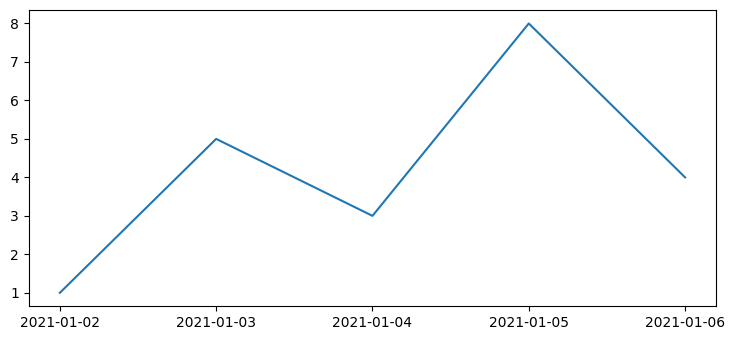

In [ ]:
from datetime import datetime
from matplotlib import pyplot as plt, dates as mdates

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

dates = ["01/02/2021", "01/03/2021", "01/04/2021", "01/05/2021", "01/06/2021", ]

x = [datetime.strptime(d, "%m/%d/%Y").date() for d in dates]
y = [1, 5, 3, 8, 4]

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.plot(x, y)

plt.show()

ValueError: could not convert string to float: '2009-01-01'

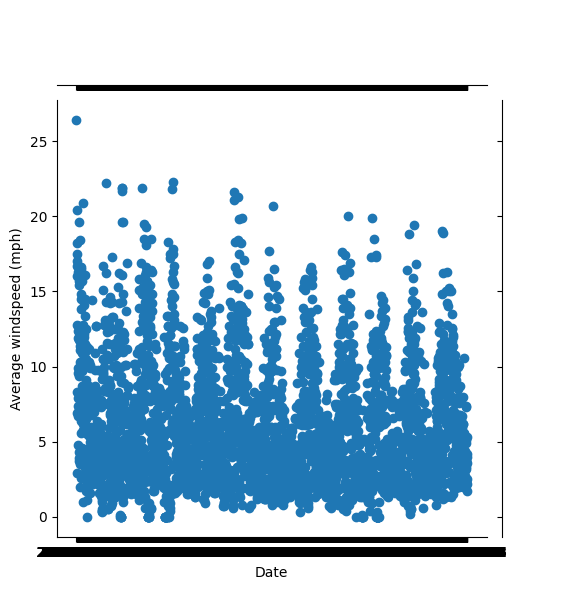

In [ ]:
sns.jointplot(x='Date',y='Average windspeed (mph)', data=data_raw)